In [30]:
# импорт библиотек
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
# загрузка данных о ноутбуках
dataset = pd.read_csv('Laptop-Price.csv')
dataset.head()

,Company,Product,TypeName,Inches,ScreenResolution,Ram,OpSys,Cpu Brand,Cpu Model,Cpu Rate,SSD,HDD,Flash Storage,Hybrid,Gpu Brand,Gpu Model,Unnamed: 16,Price_euros
0,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8GB,No OS,Intel,Core i5 7200U,2.5GHz,256,0,0,0,Intel,HD Graphics 620,NaN,575.0
1,Acer,Aspire 3,Notebook,15.6,1366x768,4GB,Windows 10,AMD,A9-Series 9420,3GHz,0,500,0,0,AMD,Radeon R5,NaN,400.0
2,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,16GB,Windows 10,Intel,Core i7 8550U,1.8GHz,512,0,0,0,Nvidia,GeForce MX150,NaN,1495.0
3,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,8GB,Windows 10,Intel,Core i5 8250U,1.6GHz,256,0,0,0,Intel,UHD Graphics 620,NaN,770.0
4,HP,250 G6,Notebook,15.6,1366x768,4GB,No OS,Intel,Core i5 7200U,2.5GHz,0,500,0,0,Intel,HD Graphics 620,NaN,393.9


In [32]:
# Выделение признаков и целевой 
X = dataset.loc[:,'SSD':'SSD']
y = dataset['Price_euros']
print('Матрица признаков: ')
print(X[:5])
print('Зависимая переменная: ')
print(y[:5])

Матрица признаков: 
   SSD
0  256
1    0
2  512
3  256
4    0
Зависимая переменная: 
0     575.0
1     400.0
2    1495.0
3     770.0
4     393.9
Name: Price_euros, dtype: float64


In [33]:
# Разделение выборки на тестовую и тренировочную
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=0)

In [34]:
# Обучение модели линейной регрессии
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [35]:
# Предсказание тестовых данных
y_pred = regression.predict(X_test)
print(y_pred)

[1080.15040434 1830.45194788 1080.15040434 1830.45194788  830.04988983
  830.04988983 1330.25091885  830.04988983  830.04988983  830.04988983
 1330.25091885 1330.25091885  830.04988983 1330.25091885 1830.45194788
  830.04988983 1830.45194788  830.04988983  830.04988983  830.04988983
 1830.45194788  830.04988983 1330.25091885 1330.25091885  830.04988983
 1330.25091885 1080.15040434 1830.45194788 1330.25091885  830.04988983
 1330.25091885 1830.45194788  830.04988983  830.04988983 1330.25091885
 1080.15040434 1330.25091885 1080.15040434 1080.15040434 1080.15040434
 1080.15040434 1330.25091885  830.04988983  830.04988983 1080.15040434
  832.00380009 1830.45194788  830.04988983 1330.25091885 1080.15040434
 1330.25091885  830.04988983  830.04988983 1330.25091885  830.04988983
 1330.25091885 1330.25091885 1830.45194788 1330.25091885 1330.25091885
  830.04988983 1330.25091885 1330.25091885  830.04988983  830.04988983
  830.04988983 1330.25091885  832.00380009  830.04988983 1330.25091885
 1330.

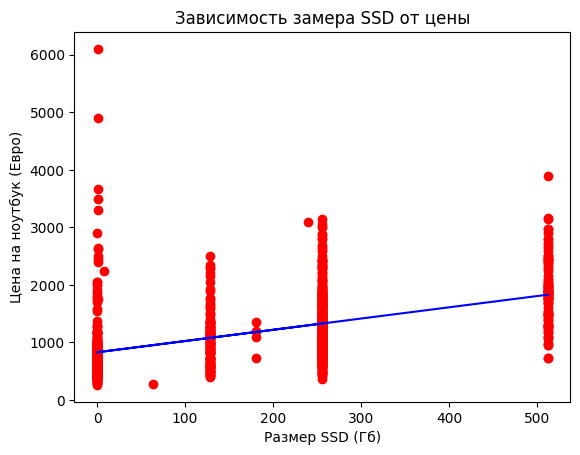

In [37]:
# Визуализация результатов обучение модели.
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regression.predict(X_train), color = 'blue')
plt.title('Зависимость замера SSD от цены')
plt.xlabel('Размер SSD (Гб)')
plt.ylabel('Цена на ноутбук (Евро)')
plt.show()

- На данном графике можно увидеть, что чем большое объём памяти, тем скорее всего будет дороже ноутбук, однако видно, что некоторые ноутбуки с низком объемом памяти все-равно имеют довольно высокую цену